In [27]:
import pandas as pd
import numpy as np

from tensorflow import random

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l1, l2, l1_l2

from sklearn.model_selection import train_test_split

In [12]:
X = pd.read_csv('datasets/avila-tr_feats.csv')
y = pd.read_csv('datasets/avila-tr_target.csv')

In [4]:
seed = 1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Modelo 1

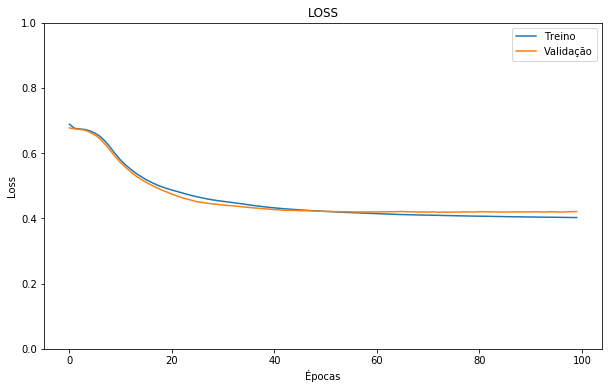

In [19]:
np.random.seed(seed)
random.set_seed(seed)

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', metrics=['accuracy'], loss='binary_crossentropy')

history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.figure(figsize=[10, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('LOSS')
plt.legend(['Treino', 'Validação'])
plt.show()

## Modelo 2 (com L2)

Melhor acurácia na validação =  0.7905081510543823


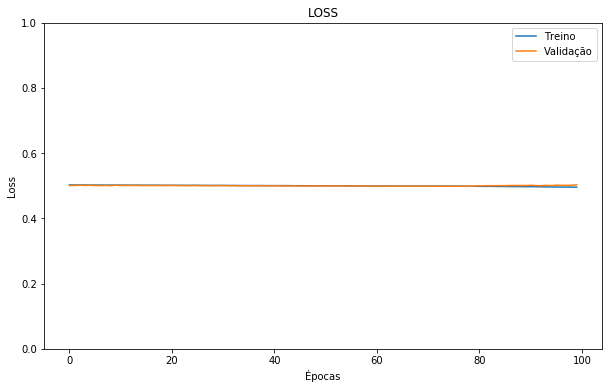

In [24]:
np.random.seed(seed)
random.set_seed(seed)

l2_param = 0.005

model_2 = Sequential()
model_2.add(Dense(10, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(l2_param)))
model_2.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='sgd', metrics=['accuracy'], loss='binary_crossentropy')

history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.figure(figsize=[10, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('LOSS')
plt.legend(['Treino', 'Validação'])
print('Melhor acurácia na validação = ', max(history.history['val_accuracy']))
plt.show()

## Modelo 3 (com L1)

Melhor acurácia na validação =  0.7929050922393799


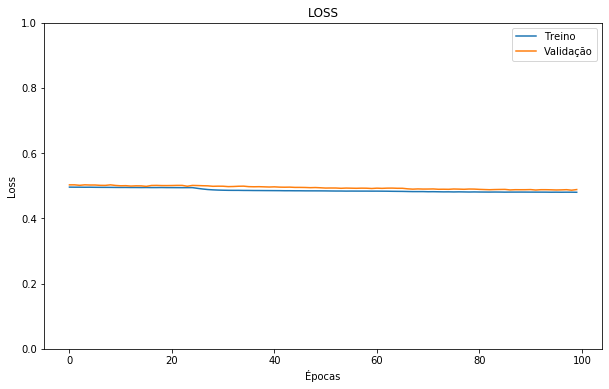

In [26]:
np.random.seed(seed)
random.set_seed(seed)

l1_param = 0.005

model_3 = Sequential()
model_3.add(Dense(10, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(l1_param)))
model_3.add(Dense(6, activation='relu', kernel_regularizer=l2(l1_param)))
model_3.add(Dense(4, activation='relu', kernel_regularizer=l2(l1_param)))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='sgd', metrics=['accuracy'], loss='binary_crossentropy')

history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.figure(figsize=[10, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('LOSS')
plt.legend(['Treino', 'Validação'])
print('Melhor acurácia na validação = ', max(history.history['val_accuracy']))
plt.show()

## Modelo 4 (com L1 e L2)

Melhor acurácia na validação =  0.7924256920814514


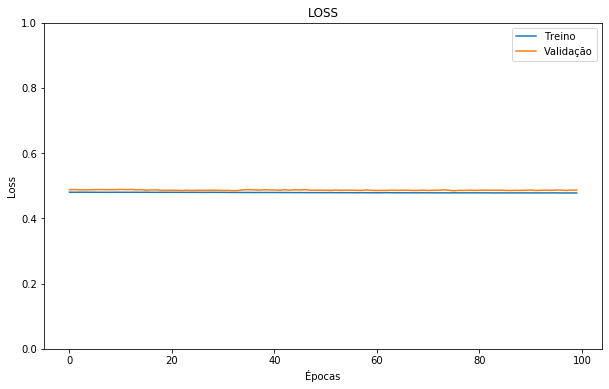

In [28]:
np.random.seed(seed)
random.set_seed(seed)

l1_param = 0.005
l2_param = 0.005

model_4 = Sequential()
model_4.add(Dense(10, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_4.add(Dense(6, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_4.add(Dense(4, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(optimizer='sgd', metrics=['accuracy'], loss='binary_crossentropy')

history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

plt.figure(figsize=[10, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('LOSS')
plt.legend(['Treino', 'Validação'])
print('Melhor acurácia na validação = ', max(history.history['val_accuracy']))
plt.show()